### Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
pd.set_option('display.max_columns', None)

### Reading the data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,BrandName,Brand_ID,Year,TotalSales,LagTotalSales,2LagTotalSales,LnSales,LnLSales,Ln2Lsales,LnDiff,diff,IfDom,DollarSales,PricePerUnit,LagPrice,LnPrice,LnLPrice,Mag,News,Outdoor,Broad,Print,LnMag,LnNews,LnOut,LnBroad,LnPrint,Tier1,Tier2,TotalMinusSales,LagTotalMinusSales,TierSales,OutsideTierSales,LagTierSales,LagOutsideTierSales,Firstintro,Marketshare,LagMktshare,YearID,total_ad
0,Absolut,15,1995,3000,2905,2790,8.006368,7.974189,7.933797,0.032179,0.032702,0,352040.0,117.3467,109.2943,4.765132,4.694044,25713.7,291.4,332.7,1.0,26005.1,0.00000,0.000000,0.000010,0.000010,10.16605,1,0,60840,60903,1080,59760,1035,59868,0,0.133923,0.124241,3,52343.9
1,Absolut,15,1996,3340,3000,2905,8.113726,8.006368,7.974189,0.107358,0.113333,0,370072.0,110.8000,117.3467,4.707727,4.765133,25658.0,177.6,625.0,1.0,25835.6,10.15261,5.325933,6.384520,0.000010,10.15951,1,0,60532,60840,1255,59277,1080,59760,0,0.142007,0.133923,4,52297.2
2,Absolut,15,1997,3440,3340,3000,8.143227,8.113726,8.006368,0.029501,0.029940,0,381152.0,110.8000,110.8000,4.707727,4.707727,27013.9,201.7,515.7,1.0,27215.6,10.20411,5.306781,6.245525,0.000010,10.21155,1,0,60464,60532,1532,58932,1255,59277,0,0.146758,0.142007,5,54947.9
3,Absolut,15,1998,3630,3440,3340,8.196988,8.143227,8.113726,0.053762,0.055233,0,419737.0,115.6300,110.8000,4.750396,4.707727,27617.0,308.2,1420.4,161.9,27925.2,10.22619,5.730749,7.258694,5.086979,10.23728,1,0,60306,60464,1730,58576,1532,58932,0,0.146106,0.146758,6,57432.7
4,Absolut,15,1999,4050,3630,3440,8.306472,8.196988,8.143227,0.109484,0.115702,0,468302.0,115.6301,115.6300,4.750397,4.750395,30605.3,258.1,1416.8,70.3,30863.4,10.32893,5.553347,7.256156,4.252772,10.33733,1,0,59918,60306,2118,57800,1730,58576,0,0.161284,0.146106,7,63213.9


In [3]:
absolut = df[(df.BrandName=='Absolut')]
absolut.drop(columns=['BrandName','Brand_ID'], inplace=True)

vars_ = ['TotalSales','LagTotalSales','2LagTotalSales','DollarSales','PricePerUnit','LagPrice',
                'Mag','News','Outdoor','Broad','Print','Marketshare','total_ad']

absolut[vars_]

,TotalSales,LagTotalSales,2LagTotalSales,DollarSales,PricePerUnit,LagPrice,Mag,News,Outdoor,Broad,Print,Marketshare,total_ad
0,3000,2905,2790,352040.0,117.3467,109.2943,25713.7,291.4,332.7,1.0,26005.1,0.133923,52343.9
1,3340,3000,2905,370072.0,110.8000,117.3467,25658.0,177.6,625.0,1.0,25835.6,0.142007,52297.2
2,3440,3340,3000,381152.0,110.8000,110.8000,27013.9,201.7,515.7,1.0,27215.6,0.146758,54947.9
3,3630,3440,3340,419737.0,115.6300,110.8000,27617.0,308.2,1420.4,161.9,27925.2,0.146106,57432.7
4,4050,3630,3440,468302.0,115.6301,115.6300,30605.3,258.1,1416.8,70.3,30863.4,0.161284,63213.9
5,4605,4050,3630,560025.0,121.6124,115.6301,33971.3,533.4,1336.7,143.1,34504.7,0.173368,70489.2
6,4379,4605,4050,556550.0,127.0952,121.6124,28559.8,231.3,1999.0,134.2,28791.1,0.157546,59715.4
7,4475,4379,4605,594000.0,132.7374,127.0952,30387.3,424.8,523.1,1.0,30812.1,0.150425,62148.3
8,4488,4475,4379,620000.0,138.1462,132.7374,29275.0,958.6,2819.4,315.5,30233.6,0.139245,63602.1
9,4640,4488,4475,658880.0,142.0000,138.1462,31208.5,5.9,2185.1,2202.4,31214.4,0.134353,66816.3


In [4]:
absolut.columns

Index(['Year', 'TotalSales', 'LagTotalSales', '2LagTotalSales', 'LnSales',
       'LnLSales', 'Ln2Lsales', 'LnDiff', 'diff', 'IfDom', 'DollarSales',
       'PricePerUnit', 'LagPrice', 'LnPrice', 'LnLPrice', 'Mag', 'News',
       'Outdoor', 'Broad', 'Print', 'LnMag', 'LnNews', 'LnOut', 'LnBroad',
       'LnPrint', 'Tier1', 'Tier2', 'TotalMinusSales', 'LagTotalMinusSales',
       'TierSales', 'OutsideTierSales', 'LagTierSales', 'LagOutsideTierSales',
       'Firstintro', 'Marketshare', 'LagMktshare', 'YearID', 'total_ad'],
      dtype='object')

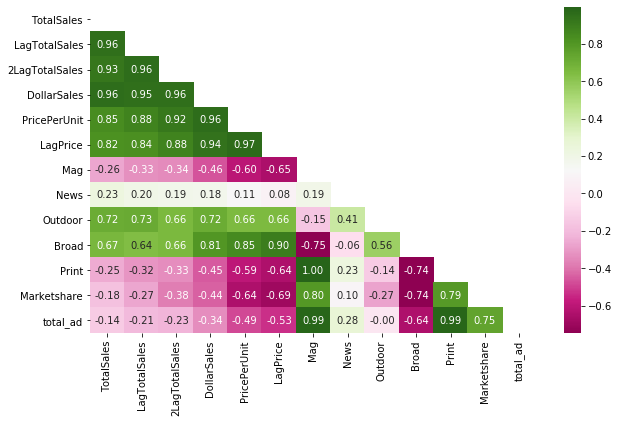

In [5]:
corr = absolut[vars_].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PiYG', mask=mask)
plt.show()

### Variables relationship

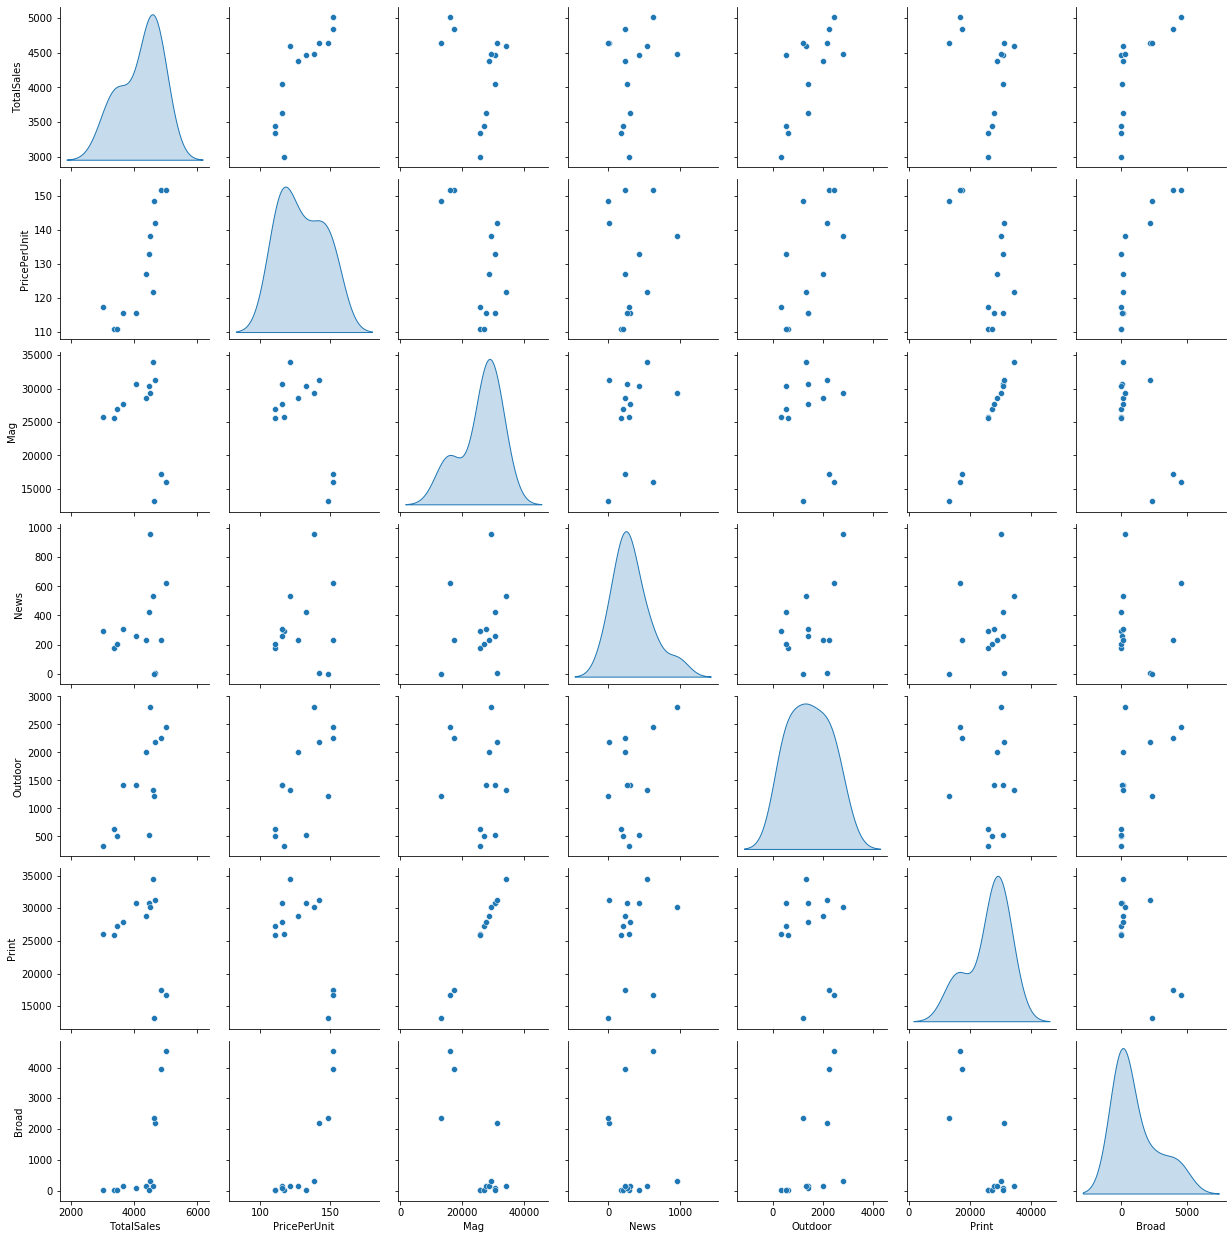

In [6]:
sns.pairplot(absolut[['TotalSales','PricePerUnit','Mag','News','Outdoor',
                      'Print','Broad']], diag_kind='kde')
plt.show()

### Scaling the Data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
absolut_scale = absolut[vars_].copy()
absolut_scale.iloc[:,1:] = pd.DataFrame(scaler.fit_transform(absolut_scale.iloc[:,1:]), 
                                        columns = absolut_scale.columns[1:])

## Modeling

In [9]:
model = sm.formula.ols('TotalSales ~ PricePerUnit', data = absolut_scale).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalSales   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     27.59
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           0.000272
Time:                        22:29:48   Log-Likelihood:                -93.777
No. Observations:                  13   AIC:                             191.6
Df Residuals:                      11   BIC:                             192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4195.6154     99.057     42.356      0.000    3977.593    4413.637
PricePerUnit   520.2894     99.057      5.252      0.000     302.267     738.311
==============================================================================
Omnibus:                        2.679   Durbin-Watson:                   0.667
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                0.577
Skew:                          -0.208   Prob(JB):                        0.749
Kurtosis:                       3.944   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model = sm.formula.ols('''TotalSales ~ PricePerUnit + Mag + News + Outdoor + Broad * Print'''
                       , data = absolut_scale).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalSales   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     21.54
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           0.000816
Time:                        22:29:48   Log-Likelihood:                -81.686
No. Observations:                  13   AIC:                             177.4
Df Residuals:                       6   BIC:                             181.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3797.7493    107.593     35.298      0.000    3534.480    4061.019
PricePerUnit   610.2994    113.680      5.369      0.002     332.134     888.464
Mag            236.6677     53.539      4.420      0.004     105.663     367.672
News          -239.9551     85.799     -2.797      0.031    -449.898     -30.012
Outdoor        177.6230     92.448      1.921      0.103     -48.588     403.834
Broad         -361.8367    170.788     -2.119      0.078    -779.740      56.066
Print          224.9884     51.906      4.334      0.005      97.978     351.999
Broad:Print   -535.6928    126.134     -4.247      0.005    -844.331    -227.055
==============================================================================
Omnibus:                        3.175   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.691
Skew:                          -0.883   Prob(JB):                        0.429
Kurtosis:                       2.960   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""